In [ ]:
cipcodes = {1:"AGRICULTURE, AGRICULTURE OPERATIONS, AND RELATED SCIENCES.",\
            3: "NATURAL RESOURCES AND CONSERVATION", 4: "ARCHITECTURE AND RELATED SERVICES.",\
            5: "AREA, ETHNIC, CULTURAL, AND GENDER STUDIES.", 9: "COMMUNICATION, JOURNALISM, AND RELATED PROGRAMS.",\
            10: "COMMUNICATIONS TECHNOLOGIES/TECHNICIANS AND SUPPORT SERVICES.", 11: "COMPUTER AND INFORMATION SCIENCES AND SUPPORT SERVICES.",\
            12: "PERSONAL AND CULINARY SERVICES.",  13: "EDUCATION.", 14: "ENGINEERING.",\
            15: "ENGINEERING TECHNOLOGIES/TECHNICIANS.", 16: "FOREIGN LANGUAGES, LITERATURES, AND LINGUISTICS.",\
            19: "FAMILY AND CONSUMER SCIENCES/HUMAN SCIENCES.", 22: "LEGAL PROFESSIONS AND STUDIES.",\
            23: "ENGLISH LANGUAGE AND LITERATURE/LETTERS.", 24: "LIBERAL ARTS AND SCIENCES, GENERAL STUDIES AND HUMANITIES.",\
            25: "LIBRARY SCIENCE.",  26: "BIOLOGICAL AND BIOMEDICAL SCIENCES.", 27: "MATHEMATICS AND STATISTICS.",\
            28: "RESERVE OFFICER TRAINING CORPS (JROTC, ROTC).", 29: "MILITARY TECHNOLOGIES.",\
            30: "MULTI/INTERDISCIPLINARY STUDIES.",         31: "PARKS, RECREATION, LEISURE, AND FITNESS STUDIES.",\
            32: "BASIC SKILLS.", 33: "CITIZENSHIP ACTIVITIES.", 34: "HEALTH-RELATED KNOWLEDGE AND SKILLS.",\
            35: "INTERPERSONAL AND SOCIAL SKILLS.",         36: "LEISURE AND RECREATIONAL ACTIVITIES.",\
            37: "PERSONAL AWARENESS AND SELF-IMPROVEMENT.", 38: "PHILOSOPHY AND RELIGIOUS STUDIES.",\
            39: "THEOLOGY AND RELIGIOUS VOCATIONS.",        40: "PHYSICAL SCIENCES.",\
            41: "SCIENCE TECHNOLOGIES/TECHNICIANS.",        42: "PSYCHOLOGY.",\
            43: "SECURITY AND PROTECTIVE SERVICES.",        44: "PUBLIC ADMINISTRATION AND SOCIAL SERVICE PROFESSIONS.",\
            45: "SOCIAL SCIENCES.",                                  46: "CONSTRUCTION TRADES.",\
            47: "MECHANIC AND REPAIR TECHNOLOGIES/TECHNICIANS.",     48: "PRECISION PRODUCTION.",\
            49: "TRANSPORTATION AND MATERIALS MOVING.",              50: "VISUAL AND PERFORMING ARTS.",\
            51: "HEALTH PROFESSIONS AND RELATED CLINICAL SCIENCES.", 52: "BUSINESS, MANAGEMENT, MARKETING, AND RELATED SUPPORT SERVICES.",\
            53: "HIGH SCHOOL/SECONDARY DIPLOMAS AND CERTIFICATES.",  54: "HISTORY" }

carnegie = { 15: "Doctoral/Research Universities--Extensive",\
            16: "Doctoral/Research Universities--Intensive",\
            21: "Masters Colleges and Universities I",\
            22: "Masters Colleges and Universities II",\
            31: "Baccalaureate Colleges--Liberal Arts",\
            32: "Baccalaureate Colleges--General",\
            33: "Baccalaureate/Associates Colleges",\
            40: "Associates Colleges",\
            51: "Theological seminaries and other specialized faith-related institutions",\
            52: "Medical schools and medical centers",\
            53: "Other separate health profession schools",\
            54: "Schools of engineering and technology",\
            55: "Schools of business and management",\
            56: "Schools of art, music, and design",\
            57: "Schools of law",\
            58: "Teachers colleges",\
            59: "Other specialized institutions",\
            60: "Tribal colleges",\
            -2: "Not applicable, not in Carnegie universe (not accredited or nondegree-granting)" }

In [6]:
import pandas as pd 

outcomes    = pd.read_csv('../data/Most-Recent-Cohorts-Field-of-Study.csv') # outcomes

insts       = pd.read_csv('../data/hd2020.csv', encoding='cp1252')

In [3]:
outcomes.head()

,UNITID,OPEID6,INSTNM,CONTROL,MAIN,CIPCODE,CIPDESC,CREDLEV,CREDDESC,IPEDSCOUNT1,...,BBRR4_FED_COMP_N,BBRR4_FED_COMP_DFLT,BBRR4_FED_COMP_DLNQ,BBRR4_FED_COMP_FBR,BBRR4_FED_COMP_DFR,BBRR4_FED_COMP_NOPROG,BBRR4_FED_COMP_MAKEPROG,BBRR4_FED_COMP_PAIDINFULL,BBRR4_FED_COMP_DISCHARGE,DISTANCE
0,100654.0,1002,Alabama A & M University,Public,1,100,"Agriculture, General.",3,Bachelor's Degree,NaN,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,0
1,100654.0,1002,Alabama A & M University,Public,1,101,Agricultural Business and Management.,3,Bachelor's Degree,NaN,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,0
2,100654.0,1002,Alabama A & M University,Public,1,109,Animal Sciences.,3,Bachelor's Degree,6.0,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,1
3,100654.0,1002,Alabama A & M University,Public,1,110,Food Science and Technology.,3,Bachelor's Degree,7.0,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,1
4,100654.0,1002,Alabama A & M University,Public,1,110,Food Science and Technology.,5,Master's Degree,8.0,...,12,PS,PS,PS,PS,PS,PS,PS,PS,1


In [4]:
outcomes[['EARN_COUNT_WNE_HI_1YR', 'EARN_COUNT_WNE_1YR','EARN_COUNT_MALE_WNE_1YR', 'EARN_COUNT_NOMALE_WNE_1YR']].replace('PS', None).dropna()

,EARN_COUNT_WNE_HI_1YR,EARN_COUNT_WNE_1YR,EARN_COUNT_MALE_WNE_1YR,EARN_COUNT_NOMALE_WNE_1YR
51,35,42,16,27
59,51,56,30,26
66,97,115,54,61
87,76,72,19,53
89,79,82,40,43
...,...,...,...,...
232732,104,107,21,86
233379,80,91,47,44
233453,25,44,28,16
233670,185,106,52,54


In [5]:
unitids = list(insts.loc[insts['INSTSIZE'] >= 3, 'UNITID'].values)

NameError: name 'insts' is not defined

In [117]:
outcomes = outcomes[outcomes['UNITID'].isin(unitids)]

In [118]:

outcomes['CS']                      = outcomes['CIPCODE'].astype(str).apply(lambda x: (len(x)==4) and (x.startswith('11')))

outcomes                            = outcomes[outcomes['EARN_COUNT_WNE_1YR']      != 'PS']
outcomes                            = outcomes[outcomes['EARN_COUNT_PELL_WNE_1YR'] != 'PS']

outcomes['EARN_COUNT_WNE_1YR']      = outcomes['EARN_COUNT_WNE_1YR'].astype(int)
outcomes['EARN_COUNT_PELL_WNE_1YR'] = outcomes['EARN_COUNT_PELL_WNE_1YR'].astype(int)

In [119]:
outcomes = outcomes.rename(columns={'EARN_COUNT_WNE_1YR': 'total_count', \
                                    'EARN_COUNT_PELL_WNE_1YR': 'pell_count'})

outcomes['nopell_count'] = outcomes['total_count'] - outcomes['pell_count']

In [120]:
outcomes[['INSTNM', 'total_count', 'pell_count', 'nopell_count']]

,INSTNM,total_count,pell_count,nopell_count
15,Alabama A & M University,32,28,4
16,Alabama A & M University,36,34,2
24,Alabama A & M University,25,20,5
29,Alabama A & M University,39,33,6
30,Alabama A & M University,30,27,3
...,...,...,...,...
222224,The Pennsylvania State University,292,140,152
222226,The Pennsylvania State University,364,133,231
222230,The Pennsylvania State University,146,36,110
222231,The Pennsylvania State University,116,39,77


In [126]:
a = outcomes[outcomes['CIPCODE'] == 1107]

a[['pell_count', 'nopell_count']]

,pell_count,nopell_count
2304,20,5
3421,217,77
3978,104,49
5345,43,21
6710,25,8
...,...,...
203032,183,107
204920,128,19
209701,50,14
209850,39,9


In [123]:
outcomes['weird'] = outcomes['pell_count'] > outcomes['nopell_count']

outcomes[['weird', 'CIPCODE']]

,weird,CIPCODE
15,True,1002
16,True,1101
24,True,1312
29,True,1410
30,True,1419
...,...,...
222224,False,5213
222226,False,5214
222230,False,5299
222231,False,5299


In [94]:
nopell = outcomes[['UNITID', 'INSTNM', 'CS', 'nopell_count']]
nopell['pell'] = False
# nopell.rename(columns={'EARN_COUNT_NOPELL_WNE_4YR':'Count'}, inplace=True)
# nopell = nopell[nopell['Count'] != 'PS']
# nopell['Count']  = nopell['Count'].astype(float)



pell = outcomes[['UNITID', 'INSTNM', 'CS', 'pell_count']]
pell['pell'] = True
# pell.rename(columns={'EARN_COUNT_PELL_WNE_4YR':'Count'}, inplace=True)
# pell = pell[pell['Count'] != 'PS']
# pell['Count']  = pell['Count'].astype(float)

pell_stats = pell.groupby(['UNITID', 'INSTNM', 'CS', 'pell'])['pell_count'].sum().reset_index()
nopell_stats = nopell.groupby(['UNITID', 'INSTNM', 'CS', 'pell'])['nopell_count'].sum().reset_index()


/var/folders/l9/y8y3rmys2sl93tzzph3dl7jw0000gr/T/ipykernel_77095/1983783605.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nopell['pell'] = False
/var/folders/l9/y8y3rmys2sl93tzzph3dl7jw0000gr/T/ipykernel_77095/1983783605.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pell['pell'] = True


In [97]:
merged = pd.merge(pell_stats, nopell_stats, on=['UNITID', 'CS'])

In [98]:
merged#['Count_x'] >= merged['Count_y']

,UNITID,INSTNM_x,CS,pell_x,pell_count,INSTNM_y,pell_y,nopell_count
0,100654.0,Alabama A & M University,False,True,431,Alabama A & M University,False,86
1,100654.0,Alabama A & M University,True,True,34,Alabama A & M University,False,2
2,100663.0,University of Alabama at Birmingham,False,True,2438,University of Alabama at Birmingham,False,1717
3,100663.0,University of Alabama at Birmingham,True,True,30,University of Alabama at Birmingham,False,16
4,100706.0,University of Alabama in Huntsville,False,True,688,University of Alabama in Huntsville,False,322
...,...,...,...,...,...,...,...,...
6007,496265.0,Triangle Tech-Chambersburg,False,True,21,Triangle Tech-Chambersburg,False,4
6008,496283.0,Provo College-Idaho Falls Campus,False,True,95,Provo College-Idaho Falls Campus,False,14
6009,496292.0,Miller-Motte College-Chattanooga 2,False,True,317,Miller-Motte College-Chattanooga 2,False,85
6010,496326.0,Eagle Gate College-Boise Campus,False,True,100,Eagle Gate College-Boise Campus,False,13


In [12]:
filtered = outcomes[['CIPCODE']+count_variables]

,CIPCODE,EARN_COUNT_NOPELL_WNE_4YR,EARN_COUNT_PELL_WNE_4YR
0,100,PS,PS
1,101,PS,PS
2,109,PS,PS
3,110,PS,PS
4,110,PS,PS


# 

In [142]:
pwd

'/Users/fsultan/Downloads/Education/src'

# CS Completions 

In [8]:
import pandas as pd
from matplotlib import pyplot as plt
from glob import glob
from tqdm import tqdm
import numpy as np
import math
%matplotlib inline

# 2004, 2008, 2011

import warnings
warnings.filterwarnings("ignore")

unis    = pd.read_csv('../data/hd2020.csv', encoding='cp1252')
fnames  = glob('../data/IPEDS/*_A/*_rv.csv')+glob('../data/IPEDS/*_a.csv')
dfs     = []

for fname in tqdm(fnames): 

    year = int(fname.split('/')[-1].split('_')[0][1:])
    if year <= 2001:
        continue 

    df          = pd.read_csv(fname, index_col=0)
    df          = df.rename(columns={col: col.upper().strip() for col in df.columns})
    df          = df[df['AWLEVEL'].apply(lambda x: x in [5, 7, 9, 17, 18, 19])]
    df['cs']    = df['CIPCODE'].apply(lambda x: (x>=11) & (x<12))
    df['year']  = year
    df['ugd']   = df['AWLEVEL'] == 5
    df['mst']   = df['AWLEVEL'] == 7
    df['phd']   = df['AWLEVEL'] >  7

    dfs.append(df)

all_dfs = pd.concat(dfs)

100%|██████████| 24/24 [00:23<00:00,  1.00it/s]


In [40]:
all_dfs = all_dfs[all_dfs['ugd']]

cs = all_dfs[all_dfs['cs']]['CTOTALT'].sum()
all = all_dfs['CTOTALT'].sum()

merged = pd.merge(all_dfs, unis, left_index=True, right_on='UNITID')

cs_pct_ipeds = merged.groupby(['year']).apply(lambda x: 100*x[x['cs']]['CTOTALT'].sum()/x['CTOTALT'].sum())

plt.plot(cs_pct_ipeds)

### INSTSIZE

In [13]:
cs_pct = merged.groupby(['year', 'INSTSIZE']).apply(lambda x: 100*x[x['cs']]['CTOTALT'].sum()/x['CTOTALT'].sum())

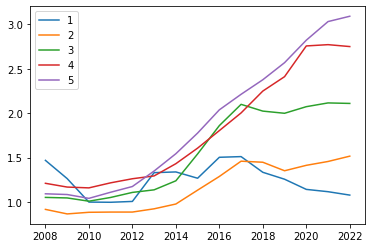

In [19]:
cs_pct = cs_pct.reset_index().dropna()
for size in cs_pct['INSTSIZE'].unique():
    if size < 0: 
        continue
    filtered = cs_pct[cs_pct['INSTSIZE'] == size]
    plt.plot(filtered['year'], filtered[0], label=size)

plt.legend()

In [39]:
unis.set_index('UNITID').loc[139755]

INSTNM      Georgia Institute of Technology-Main Campus
IALIAS                                     Georgia Tech
ADDR                                      225 North Ave
CITY                                            Atlanta
STABBR                                               GA
                               ...                     
CNGDSTCD                                           1305
LONGITUD                                     -84.394832
LATITUDE                                       33.77242
DFRCGID                                              94
DFRCUSCG                                              1
Name: 139755, Length: 72, dtype: object

In [33]:
merged[merged['cs']].groupby('UNITID')['CTOTALT'].sum().sort_values()

UNITID
146241        0.0
161341        0.0
133508        0.0
119173        0.0
107558        0.0
           ...   
228787    16250.0
211440    18169.0
139755    21510.0
433387    34222.0
163204    39472.0
Name: CTOTALT, Length: 1696, dtype: float64

In [27]:
merged[merged['INSTSIZE'] == 1]['CARNEGIE'].replace(carnegie).value_counts()

Baccalaureate Colleges--General                                                    62486
Baccalaureate Colleges--Liberal Arts                                               56742
Not applicable, not in Carnegie universe (not accredited or nondegree-granting)    37279
Theological seminaries and other specialized faith-related institutions            28930
Associates Colleges                                                                11077
Masters Colleges and Universities I                                                 9417
Schools of art, music, and design                                                   9287
Masters Colleges and Universities II                                                8573
Baccalaureate/Associates Colleges                                                   6446
Other separate health profession schools                                            5476
Other specialized institutions                                                      3618
Schools of business a

### CARNEGIE

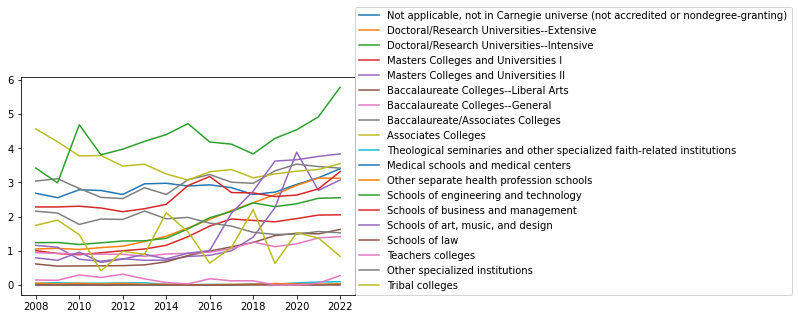

In [23]:
col = 'CARNEGIE'

cs_pct = merged.groupby(['year', col]).apply(lambda x: 100*x[x['cs']]['CTOTALT'].sum()/x['CTOTALT'].sum())
cs_pct = cs_pct.reset_index().dropna()
for col_val in cs_pct[col].unique():
    if size < 0: 
        continue
    filtered = cs_pct[cs_pct[col] == col_val]
    plt.plot(filtered['year'], filtered[0], label=carnegie[col_val])

plt.legend(loc=(1, 0))

In [ ]:
col = 'CARNEGIE'

cs_pct = merged.groupby(['year', col]).apply(lambda x: 100*x[x['cs']]['CTOTALT'].sum()/x['CTOTALT'].sum())
cs_pct = cs_pct.reset_index().dropna()
for col_val in cs_pct[col].unique():
    if size < 0: 
        continue
    filtered = cs_pct[cs_pct[col] == col_val]
    plt.plot(filtered['year'], filtered[0], label=carnegie[col_val])

plt.legend(loc=(1, 0))

# College Scorecard Data

In [75]:
from tqdm import tqdm 
fnames = glob('../../CollegeScorecardData/College_Scorecard_Raw_Data_04082024/Field*')

scorecards = []

for fname in tqdm(fnames): 
    df = pd.read_csv(fname)
    df['year'] = int(fname.split('/')[-1].split('_')[0][-4:])
    scorecards.append(df)

all_sc = pd.concat(scorecards)

100%|██████████| 5/5 [00:12<00:00,  2.52s/it]


In [77]:
all_sc['cs'] = all_sc['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11'))

In [86]:
cs_pct_sc = all_sc.groupby('year').apply(lambda x: x[x['cs']]['IPEDSCOUNT1'].sum()/x['IPEDSCOUNT1'].sum())

In [90]:
cs_pct_sc.index = range(2014, 2019)

In [89]:
cs_pct_ipeds

year
2002         NaN
2003         NaN
2004         NaN
2005         NaN
2006         NaN
2007         NaN
2008    0.987317
2009    0.968293
2010    0.982762
2011    1.030241
2012    1.083344
2013    1.191518
2014    1.351846
2015    1.481219
2016    1.636959
2017    1.786806
2018    1.973928
2019    2.164988
2020    2.346213
2021    2.499005
2022    2.655398
dtype: float64

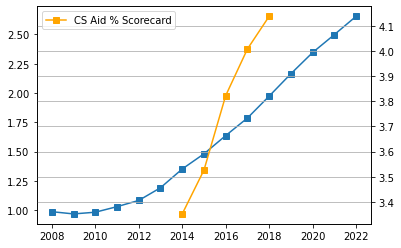

In [112]:
# plt.plot(cs_pct_ipeds.loc[2014:2019], marker='s', label='CS % IPEDS');
plt.plot(cs_pct_ipeds, marker='s', label='CS % IPEDS');
plt.twinx()
plt.plot((100*cs_pct_sc), marker='s', label='CS Aid % Scorecard', color='orange');
plt.legend()
plt.grid()

In [61]:
ipeds_count['cs'] = ipeds_count['']

,CIPCODE,IPEDSCOUNT1
2,109,6.0
3,110,7.0
4,110,8.0
5,110,2.0
7,199,2.0
...,...,...
209616,5138,39.0
209617,5138,6.0
209618,5138,0.0
209619,5139,0.0
